### Import Libraries

In [139]:
# Import libraries and load dataset

import matplotlib.pyplot as plt
import pandas as pd
import datetime
import urllib.request, json
import os
import numpy as np
import pandas_datareader as pdr

#### Import the dataset

In [140]:
# Loading the dataset and add column headers
df = pd.read_csv('output.hws-2 Jun.csv', names=['Date','Sector_Number','Sector_Name','Stock_Code','Stock_Name','Ref','Open','Last','Change','Change_%', 'Volume'])
print(df.shape)
df.head(3)

(97179, 11)


,Date,Sector_Number,Sector_Name,Stock_Code,Stock_Name,Ref,Open,Last,Change,Change_%,Volume
0,3/13/2020,1,Bursa Malaysia Bond Islamic Stocks,0400GA,DIN040000223,102.2,101.8,101.8,-0.4,-0.39,1
1,3/13/2020,1,Bursa Malaysia Bond Islamic Stocks,0400GC,DIN042300721,101.8,0.0,0.0,0.0,0.00,0
2,3/13/2020,1,Bursa Malaysia Bond Islamic Stocks,0400GB,DIN045801028,104.5,104.5,104.5,0.0,0.00,1


In [141]:
df.nunique()

Date                51
Sector_Number       20
Sector_Name         20
Stock_Code        2148
Stock_Name        2150
Ref               1610
Open              1612
Last              1602
Change             316
Change_%          3433
Volume           27029
dtype: int64

In [142]:
df.astype({"Date": str})

,Date,Sector_Number,Sector_Name,Stock_Code,Stock_Name,Ref,Open,Last,Change,Change_%,Volume
0,3/13/2020,1,Bursa Malaysia Bond Islamic Stocks,0400GA,DIN040000223,102.200,101.800,101.800,-0.400,-0.39,1
1,3/13/2020,1,Bursa Malaysia Bond Islamic Stocks,0400GC,DIN042300721,101.800,0.000,0.000,0.000,0.00,0
2,3/13/2020,1,Bursa Malaysia Bond Islamic Stocks,0400GB,DIN045801028,104.500,104.500,104.500,0.000,0.00,1
3,3/13/2020,1,Bursa Malaysia Bond Islamic Stocks,0401GA,IHS046000824,99.500,0.000,0.000,0.000,0.00,0
4,3/13/2020,2,Bursa Malaysia Closed End Fund Stocks,5108,ICAP,2.070,2.050,1.990,-0.080,-3.86,917
...,...,...,...,...,...,...,...,...,...,...,...
97174,6/2/2020,20,Bursa Malaysia Utilities Stocks,6742,YTLPOWR,0.685,0.685,0.690,0.005,0.73,10413
97175,6/2/2020,20,Bursa Malaysia Utilities Stocks,674210,YTLPOWR-C10,0.035,0.000,0.000,0.000,0.00,0
97176,6/2/2020,20,Bursa Malaysia Utilities Stocks,674211,YTLPOWR-C11,0.030,0.025,0.025,-0.005,-16.67,1500
97177,6/2/2020,20,Bursa Malaysia Utilities Stocks,674212,YTLPOWR-C12,0.020,0.000,0.000,0.000,0.00,0


There are different products to trade in Bursa Malaysia such as shares, warrant, REITs etc.

This assignment will be focus on ordinary shares by obtained the description of shares from Bursa Malaysia

#### Import the second dataset

In [143]:
# Read remote pdf into list of DataFrame
import tabula

file = 'https://www.bursamalaysia.com/sites/5d809dcf39fba22790cad230/assets/5eb11db439fba21077e45ee6/isinequity.pdf'
tabula.read_pdf(file,pages='all')

[   Bursa Malaysia BerhadAs at 5 May 2020\rInternational Securities Identification Number (ISIN)  \
 0                                                 No.                                             
 1                                                   1                                             
 2                                                   2                                             
 3                                                   3                                             
 4                                                   4                                             
 5                                                   5                                             
 6                                                   6                                             
 7                                                   7                                             
 8                                                   8                                             


In [144]:
# Output all the tables in the PDF to a CSV
tabula.convert_into(file, 'isinequity.csv', output_format="csv", pages='all')

In [145]:
# Loading the dataset and add column headers
df2 = pd.read_csv('isinequity.csv')
print(df2.shape)
df2.head(3)

(2014, 9)


,Bursa Malaysia BerhadAs at 5 May 2020\rInternational Securities Identification Number (ISIN),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,No.,Issuer Name (Long),Issuer Name (Short),ISIN,Issue Description,CFI,FISN,Listing Date (yr/mth/d),Maturity Date (yr/mth/d)
1,1,7-ELEVEN MALAYSIA HOLDINGS BERHAD,SEM,MYL5250OO005,ORDINARY SHARE,ESVUFR,SEM/MYR EQ,20140530,NaN
2,2,A50CHIN-C54: CW ISHARES FTSE A50 CHINA INDEX E...,A50CHIN-C54,MYJ070354U69,CALL WARRANT - FOREIGN,RWMNCA,A50CHIN-C54/MYR SP 15 HKD 20200,20191216,20200630


In [146]:
newdf2= df2.drop_duplicates()
print(newdf2.shape)

(1923, 9)


In [147]:
new_header = newdf2.iloc[0] 

newdf2 = newdf2[1:] 

newdf2.columns = new_header
newdf2.head(3)

,No.,Issuer Name (Long),Issuer Name (Short),ISIN,Issue Description,CFI,FISN,Listing Date (yr/mth/d),Maturity Date (yr/mth/d)
1,1,7-ELEVEN MALAYSIA HOLDINGS BERHAD,SEM,MYL5250OO005,ORDINARY SHARE,ESVUFR,SEM/MYR EQ,20140530,NaN
2,2,A50CHIN-C54: CW ISHARES FTSE A50 CHINA INDEX E...,A50CHIN-C54,MYJ070354U69,CALL WARRANT - FOREIGN,RWMNCA,A50CHIN-C54/MYR SP 15 HKD 20200,20191216,20200630
3,3,A50CHIN-C56: CW ISHARES FTSE A50 CHINA INDEX E...,A50CHIN-C56,MYJ070356U91,CALL WARRANT - FOREIGN,RWMNCA,A50CHIN-C56/MYR SP 18 HKD 20200,20200203,20200930


#### Data Integration

In [148]:
# Merge 2 dataset together by using the issuer name and short name to obtain the desription of share

new_df = pd.merge(df, newdf2[['Issuer Name (Short)','Issue Description']], left_on ='Stock_Name', 
                  right_on ='Issuer Name (Short)', how ='right')
print(new_df.shape)
new_df.head(5)

(94051, 13)


,Date,Sector_Number,Sector_Name,Stock_Code,Stock_Name,Ref,Open,Last,Change,Change_%,Volume,Issuer Name (Short),Issue Description
0,3/13/2020,1.0,Bursa Malaysia Bond Islamic Stocks,0400GA,DIN040000223,102.2,101.8,101.8,-0.4,-0.39,1.0,DIN040000223,RETAILBONDS-ISLAMIC-GG
1,3/17/2020,1.0,Bursa Malaysia Bond Islamic Stocks,0400GA,DIN040000223,101.7,0.0,0.0,0.0,0.00,0.0,DIN040000223,RETAILBONDS-ISLAMIC-GG
2,3/18/2020,1.0,Bursa Malaysia Bond Islamic Stocks,0400GA,DIN040000223,101.7,0.0,0.0,0.0,0.00,0.0,DIN040000223,RETAILBONDS-ISLAMIC-GG
3,3/19/2020,1.0,Bursa Malaysia Bond Islamic Stocks,0400GA,DIN040000223,101.7,0.0,0.0,0.0,0.00,0.0,DIN040000223,RETAILBONDS-ISLAMIC-GG
4,3/20/2020,1.0,Bursa Malaysia Bond Islamic Stocks,0400GA,DIN040000223,101.7,0.0,0.0,0.0,0.00,0.0,DIN040000223,RETAILBONDS-ISLAMIC-GG


#### Data Exploration

In [149]:
# Object columns
new_df.describe(include=[np.object])

,Date,Sector_Name,Stock_Code,Stock_Name,Issuer Name (Short),Issue Description
count,94037,94037,94037,94037,94050,94050
unique,51,20,1905,1907,1920,12
top,4/30/2020,Bursa Malaysia Industrial Products & Services ...,5172,KSTAR,KSTAR,ORDINARY SHARE
freq,1908,19936,102,102,102,46935


In [150]:
# Count Unique value in all dataset columns
new_df.nunique()

Date                      51
Sector_Number             20
Sector_Name               20
Stock_Code              1905
Stock_Name              1907
Ref                     1582
Open                    1587
Last                    1574
Change                   307
Change_%                3315
Volume                 26634
Issuer Name (Short)     1920
Issue Description         12
dtype: int64

In [151]:
# Get datatypes of columns in the dataframe
new_df.dtypes

Date                    object
Sector_Number          float64
Sector_Name             object
Stock_Code              object
Stock_Name              object
Ref                    float64
Open                   float64
Last                   float64
Change                 float64
Change_%               float64
Volume                 float64
Issuer Name (Short)     object
Issue Description       object
dtype: object

In [152]:
# Calling describe method from column 6 to the last column 
new_df.iloc[:, 5:11].describe()  

,Ref,Open,Last,Change,Change_%,Volume
count,94037.000000,94037.000000,94037.000000,94037.000000,94037.000000,9.403700e+04
mean,0.998449,0.729001,0.729826,0.000669,1.576858,2.850671e+04
std,6.081090,4.336644,4.321064,0.450674,18.054881,1.532556e+05
min,0.005000,0.000000,0.000000,-97.300000,-96.880000,0.000000e+00
25%,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.145000,0.065000,0.065000,0.000000,0.000000,4.310000e+02
75%,0.520000,0.400000,0.400000,0.005000,0.720000,7.973000e+03
max,141.000000,141.000000,141.000000,4.000000,1400.000000,6.913292e+06


#### Data Cleaning

In [153]:
# Check on missing values
new_df.isnull().sum() 

Date                   14
Sector_Number          14
Sector_Name            14
Stock_Code             14
Stock_Name             14
Ref                    14
Open                   14
Last                   14
Change                 14
Change_%               14
Volume                 14
Issuer Name (Short)     1
Issue Description       1
dtype: int64

In [154]:
# Drop the missing values
df_cleaned=new_df.dropna(how='any') 
df_cleaned.isnull().sum() 

Date                   0
Sector_Number          0
Sector_Name            0
Stock_Code             0
Stock_Name             0
Ref                    0
Open                   0
Last                   0
Change                 0
Change_%               0
Volume                 0
Issuer Name (Short)    0
Issue Description      0
dtype: int64

#### Select Ordinary Share for analysis

In [155]:
# Extract the ordinary share dataset
ordinary_share = df_cleaned[df_cleaned['Issue Description'].isin(['ORDINARY SHARE'])]
print(ordinary_share.shape)
ordinary_share.head(3)

(46928, 13)


,Date,Sector_Number,Sector_Name,Stock_Code,Stock_Name,Ref,Open,Last,Change,Change_%,Volume,Issuer Name (Short),Issue Description
251,3/13/2020,3.0,Bursa Malaysia Construction Stocks,5281,ADVCON,0.310,0.280,0.280,-0.030,-9.68,4.0,ADVCON,ORDINARY SHARE
252,3/17/2020,3.0,Bursa Malaysia Construction Stocks,5281,ADVCON,0.280,0.210,0.255,-0.025,-8.93,6.0,ADVCON,ORDINARY SHARE
253,3/18/2020,3.0,Bursa Malaysia Construction Stocks,5281,ADVCON,0.255,0.275,0.265,0.010,3.92,8.0,ADVCON,ORDINARY SHARE


In [156]:
# Select the top 3 of average rate of change based on companies
ordinary_share.groupby('Stock_Name')['Change'].mean().nlargest(3)

# TOPGLOV, HARTA, SUPERMX are the top 3 highest average over the changes (%)

Stock_Name
TOPGLOV    0.172745
HARTA      0.120784
SUPERMX    0.119804
Name: Change, dtype: float64

#### Analysis on TOPGLOV
#### 1. Moving Average
#### 2. Expected Return
#### 3. Linear Regression Model

In [157]:
# Extract TOPGLOV dataset

TOPGLOV = ordinary_share.iloc[np.where(ordinary_share['Stock_Name'] == 'TOPGLOV')]
print(TOPGLOV.shape)
TOPGLOV.tail(4)

(51, 13)


,Date,Sector_Number,Sector_Name,Stock_Code,Stock_Name,Ref,Open,Last,Change,Change_%,Volume,Issuer Name (Short),Issue Description
32766,5/28/2020,10.0,Bursa Malaysia Health Care Stocks,7113,TOPGLOV,12.86,13.0,13.10,0.24,1.87,355491.0,TOPGLOV,ORDINARY SHARE
32767,5/29/2020,10.0,Bursa Malaysia Health Care Stocks,7113,TOPGLOV,13.10,13.2,13.30,0.20,1.53,363570.0,TOPGLOV,ORDINARY SHARE
32768,6/1/2020,10.0,Bursa Malaysia Health Care Stocks,7113,TOPGLOV,13.30,13.8,15.54,2.24,16.84,336342.0,TOPGLOV,ORDINARY SHARE
32769,6/2/2020,10.0,Bursa Malaysia Health Care Stocks,7113,TOPGLOV,15.54,14.8,14.80,-0.74,-4.76,282667.0,TOPGLOV,ORDINARY SHARE


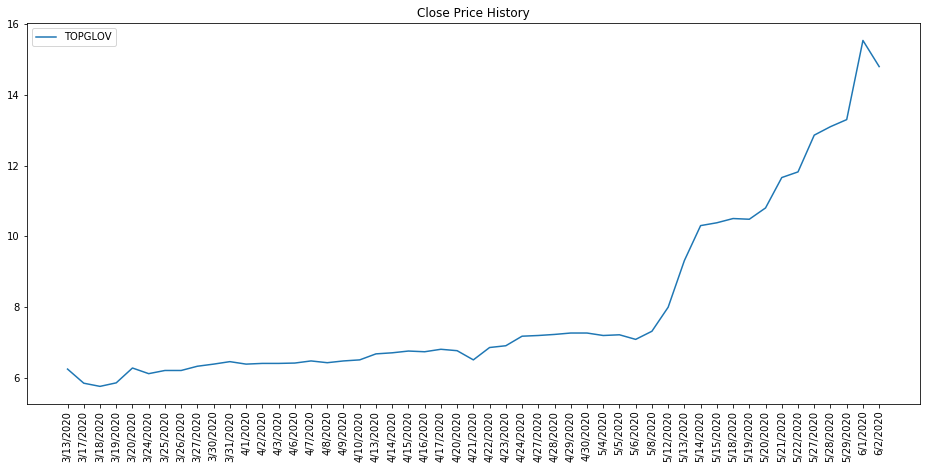

In [158]:
# Adjusting the size of matplotlib

import matplotlib as mpl
mpl.rc('figure', figsize=(16, 7))

# plot 

fig, ax = plt.subplots()
ax.plot(TOPGLOV['Date'], TOPGLOV['Last'], label='TOPGLOV')
ax.legend()
plt.title('Close Price History')
plt.xticks(rotation=90)
plt.show()

#### 1. Moving Averages

A simple moving average of the original time-series is calculated by taking for each date the average of the last W prices 
(including the price on the date of interest). 
Pandas has rolling(), a built in function for Series which returns a rolling object for a user-defined window, e.g. 10, 20 days.
The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.

In [159]:
close_px = TOPGLOV['Last']
mavg = close_px.rolling(window=10).mean()

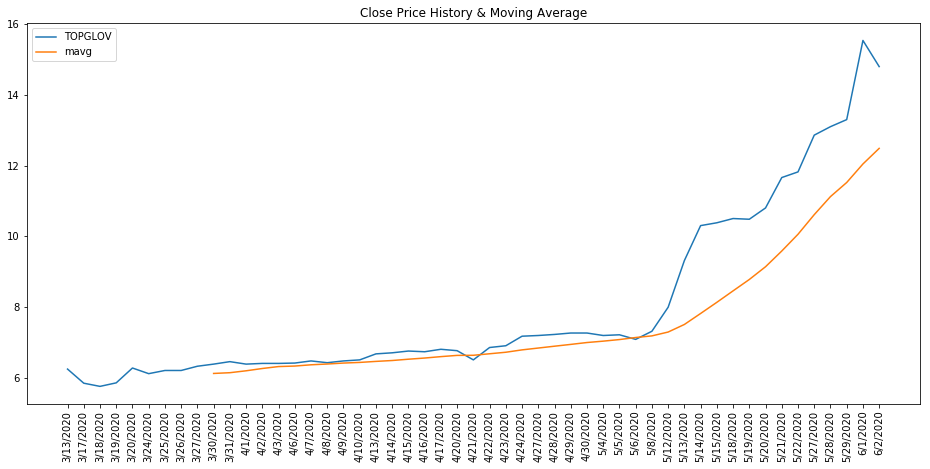

In [160]:
# plot 

fig, ax = plt.subplots()

ax.plot(TOPGLOV['Date'], close_px, label='TOPGLOV')
ax.plot(TOPGLOV['Date'], mavg, label="mavg")
ax.legend()
plt.title('Close Price History & Moving Average')
plt.xticks(rotation=90)
plt.show()

#### 2. Expected return 

It is to determine risk and return. Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.


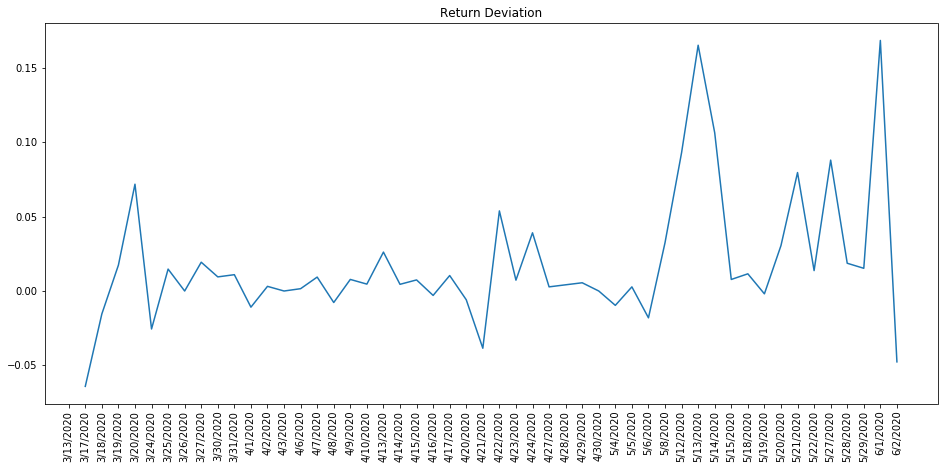

In [161]:
rets = close_px / close_px.shift(1) - 1

fig, ax = plt.subplots()
ax.plot(TOPGLOV['Date'], rets, label='return')
plt.title('Return Deviation')
plt.xticks(rotation=90)
plt.show()

Ideal stocks should return as high and stable as possible. Although this stock show largest drop with more than 5% on 17 March 2020, it has more than 15% increase 13 May 2020 and 1 June 2020.

#### 3. Linear Regression Model

In [162]:
#Train Test Split
#Import package for splitting data set

from sklearn.model_selection import train_test_split

In [163]:
# Split data into train and test set: 70% / 30%
train, test = train_test_split(TOPGLOV, test_size=0.30)

In [164]:
# Create and Train the Model

# Import package for linear model
from sklearn.linear_model import LinearRegression

In [165]:
# Reshape index column to 2D array for .fit() method

X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Last']

In [166]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [167]:
# Model Evaluation

# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))

# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.14363990619225847
Intercept:  -4695.409820794049


Interpreting the coefficients: The slope coefficient tells us that with a 1 unit increase in date the closing price increases by RM0.1499

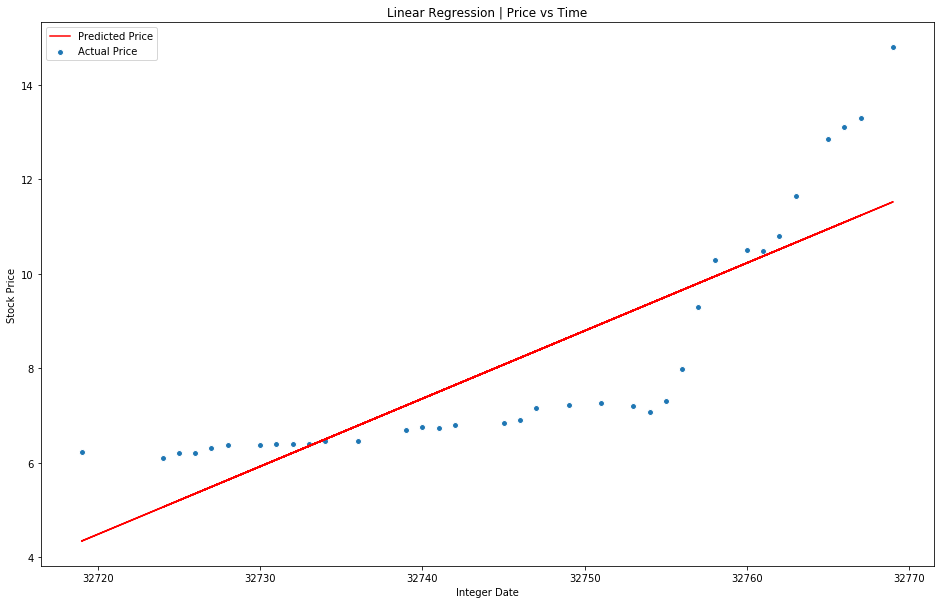

In [168]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### Prediction from Model

In [169]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Last']

In [170]:
# Generate array with predicted values
y_pred = model.predict(X_test)
y_pred

array([ 4.91882954,  8.50982719,  5.78066897, 10.08986616,  9.08438681,
        6.92978822,  7.79162766,  4.77518963,  6.64250841, 10.80806569,
        4.63154972,  8.797107  ,  4.48790982,  7.07342813, 11.38262531,
        7.93526757])

#### 1. Regression Evaluation

Comparison between the predicted values and the actual value on random sample

In [171]:
# Generate 10 random numbers from 51
randints = np.random.randint(51, size=10)

# Select row numbers == random numbers
df_sample = TOPGLOV[TOPGLOV.index.isin(randints)]

In [172]:
# Add new column for predictions to df
TOPGLOV['Prediction'] = model.predict(np.array(TOPGLOV.index).reshape(-1, 1))

C:\Users\USER\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


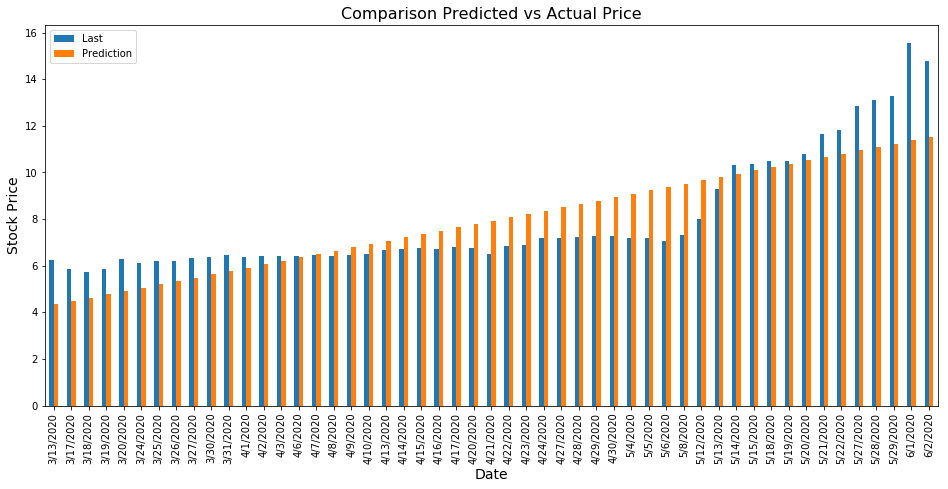

In [173]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
TOPGLOV.plot(x='Date', y=['Last', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price', fontsize=16)

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price', fontsize=14)

# Show plot
plt.show()

There are large variations between predicted and actual values in the sample.

#### 2. Residual Histogram

The residuals are nearly normally distributed around zero, with a slight skewedness to the right.

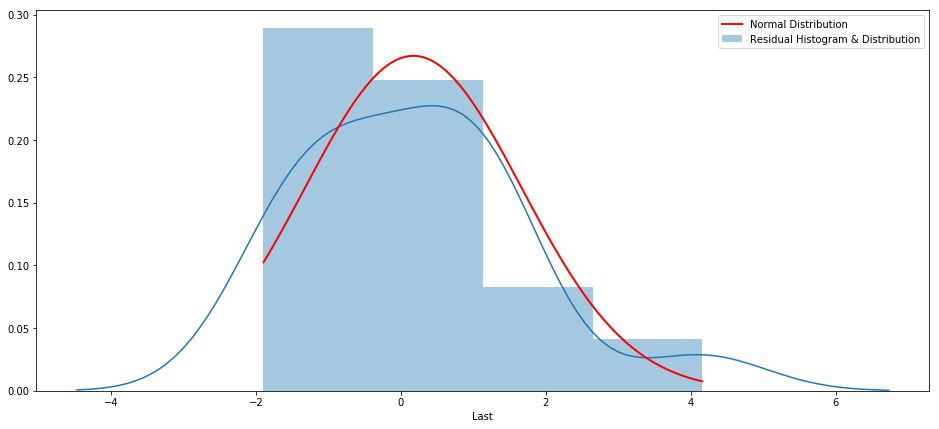

In [174]:
# Import norm package to plot normal distribution
from scipy.stats import norm
import seaborn as sns

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [175]:
TOPGLOV.head()

,Date,Sector_Number,Sector_Name,Stock_Code,Stock_Name,Ref,Open,Last,Change,Change_%,Volume,Issuer Name (Short),Issue Description,Prediction
32719,3/13/2020,10.0,Bursa Malaysia Health Care Stocks,7113,TOPGLOV,6.51,6.30,6.24,-0.27,-4.15,219.0,TOPGLOV,ORDINARY SHARE,4.34427
32720,3/17/2020,10.0,Bursa Malaysia Health Care Stocks,7113,TOPGLOV,5.88,5.70,5.84,-0.04,-0.68,292.0,TOPGLOV,ORDINARY SHARE,4.48791
32721,3/18/2020,10.0,Bursa Malaysia Health Care Stocks,7113,TOPGLOV,5.84,5.89,5.75,-0.09,-1.54,131.0,TOPGLOV,ORDINARY SHARE,4.63155
32722,3/19/2020,10.0,Bursa Malaysia Health Care Stocks,7113,TOPGLOV,5.75,5.74,5.85,0.10,1.74,122.0,TOPGLOV,ORDINARY SHARE,4.77519
32723,3/20/2020,10.0,Bursa Malaysia Health Care Stocks,7113,TOPGLOV,5.85,6.00,6.27,0.42,7.18,221.0,TOPGLOV,ORDINARY SHARE,4.91883


#### Model Evaluation Metrics

1. Mean Absolute Error

Mean Absolute Error (MAE) is the average of the difference between the Original Values and the Predicted Values. It gives us the measure of how far the predictions were from the actual output. However, they don’t gives us any idea of the direction of the error i.e. whether we are under predicting the data or over predicting the data.

2. Mean Squared Error

Mean Squared Error(MSE) is quite similar to Mean Absolute Error, the only difference being that MSE takes the average of the square of the difference between the original values and the predicted values. 

3. Root mean squared error 

Root mean squared error (RMSE) is most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. 

In [176]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [177]:
# Statistical summary of test data
TOPGLOV['Last'].describe()

count    51.000000
mean      7.989216
std       2.529004
min       5.750000
25%       6.405000
50%       6.800000
75%       8.650000
max      15.540000
Name: Last, dtype: float64

In [178]:
# Calculate and print values of MAE and MSE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.206202259617678
MSE: 2.2571555482402013
RMSE: 1.5023832893906273


#### Accuracy Evaluation Metrics

The coefficient of determination is a statistical measurement that examines how differences in one variable can be explained by the difference in a second variable, when predicting the outcome of a given event.It is more commonly known as R-squared (or R2), by assesses how strong the linear relationship is between two variables,

In [179]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.6626393540935762


In [180]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.667058984609779

The value of $R^2$ shows that are model accounts for nearly 67% of the differences between the actual stock prices and the predicted prices.